In [ ]:
%%capture
import torch
major_version, minor_version = torch.cuda.get_device_capability()
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
if major_version >= 8:
    !pip install --no-deps packaging ninja einops flash-attn xformers trl peft accelerate bitsandbytes
else:
    !pip install --no-deps xformers trl peft accelerate bitsandbytes
pass

from unsloth import FastLanguageModel

In [ ]:

import kagglehub
mathurinache_math_dataset_path = kagglehub.dataset_download('mathurinache/math-dataset')
qwen_lm_qwen2_5_math_transformers_1_5b_instruct_1_path = kagglehub.model_download('qwen-lm/qwen2.5-math/Transformers/1.5b-instruct/1')

qwen_lm_qwen2_5_transformers_0_5b_instruct_1_path = kagglehub.model_download('qwen-lm/qwen2.5/Transformers/0.5b-instruct/1')
#qwen_lm_qwen2_5_transformers_0_5b_instruct_awq_1_path = kagglehub.model_download('qwen-lm/qwen2.5/Transformers/0.5b-instruct-awq/1')

100%|██████████| 7.07M/7.07M [00:00<00:00, 79.1MB/s]

Extracting files...



  0%|          | 0.00/6.71M [00:00<?, ?B/s]



100%|██████████| 160/160 [00:00<00:00, 352kB/s]




  0%|          | 0.00/1.59M [00:00<?, ?B/s]

  0%|          | 0.00/656 [00:00<?, ?B/s]



  0%|          | 0.00/11.1k [00:00<?, ?B/s]




100%|██████████| 656/656 [00:00<00:00, 54.0kB/s]






100%|██████████| 7.14k/7.14k [00:00<00:00, 11.7MB/s]
100%|██████████| 11.1k/11.1k [00:00<00:00, 729kB/s]



100%|██████████| 4.85k/4.85k [00:00<00:00, 5.83MB/s]

 15%|█▍        | 1.00M/6.71M [00:00<00:01, 5.70MB/s]

100%|██████████| 1.59M/1.59M [00:00<00:00, 7.95MB/s]





  0%|          | 1.00M/2.88G [00:00<08:38, 5.96MB/s]
100%|██████████| 6.71M/6.71M [00:00<00:00, 23.0MB/s]





  0%|          | 10.0M/2.88G [00:00<01:25, 36.1MB/s]




  1%|          | 19.0M/2.88G [00:00<01:02, 49.4MB/s]


  0%|          | 0.00/2.65M [00:00<?, ?B/s]




  1%|          | 26.0M/2.88G [00:00<01:00, 50.2MB/s]
 38%|███▊      | 1.00M/2.65M [00:00<00:00, 5.81MB/s]




100%|██████████| 2.65M/2.65M [00:00<00:00, 11.7MB/s]





  1%|▏         | 41.0M/2.88G [00:00<00:51, 58.7MB/s]




  2%|▏         | 49.0M/2.88G [00:00<00:47, 64.0MB/s]




  2%|▏         | 57.0M/2.88G [00:01<00:45, 66.8MB/s]




  2%|▏         | 65.0M/2.88G [00:01<00:50, 60.1MB/s]




  2%|▏         | 73.0M/2.88G [00:01<00:47, 63.6MB/s]




  3%|▎         | 82.0M/2.88G [00:01<00:42, 70.3MB/s]




  3%|▎         | 90.0M/2.88G [00:01<00:40, 73.1MB/s]




  3%|▎         | 98.0M/2.88G [00:01<00:40, 73.4MB/s]




  4%|▎         | 107M/2.88G [00:01<00:37, 78.6MB/s] 




  4%|▍         | 118M/2.88G [00:01<00:34, 86.5MB/s]




  4%|▍         | 128M/2.88G [00:02<00:33, 88.9MB/s]




  5%|▍         | 137M/2.88G [00:02<00:35, 81.9MB/s]




  5%|▍         | 147M/2.88G [00:02<00:33, 87.7MB/s]




  5%|▌         | 159M/2.88G [00:02<00:29, 97.7


100%|██████████| 1.48k/1.48k [00:00<00:00, 2.96MB/s]


100%|██████████| 242/242 [00:00<00:00, 495kB/s]


  0%|          | 0.00/1.59M [00:00<?, ?B/s]

100%|██████████| 11.1k/11.1k [00:00<00:00, 17.2MB/s]




  0%|          | 0.00/6.71M [00:00<?, ?B/s]




100%|██████████| 4.80k/4.80k [00:00<00:00, 9.00MB/s]




100%|██████████| 659/659 [00:00<00:00, 320kB/s]





  0%|          | 0.00/942M [00:00<?, ?B/s]
100%|██████████| 1.59M/1.59M [00:00<00:00, 9.23MB/s]


 15%|█▍        | 1.00M/6.71M [00:00<00:01, 5.37MB/s]


100%|██████████| 6.71M/6.71M [00:00<00:00, 25.4MB/s]



  0%|          | 0.00/2.65M [00:00<?, ?B/s]


  1%|          | 9.00M/942M [00:00<00:26, 37.6MB/s]


  2%|▏         | 17.0M/942M [00:00<00:18, 53.8MB/s]



100%|██████████| 7.13k/7.13k [00:00<00:00, 9.55MB/s]

100%|██████████| 2.65M/2.65M [00:00<00:00, 12.0MB/s]



  2%|▏         | 23.0M/942M [00:00<00:21, 45.7MB/s]


  3%|▎         | 29.0M/942M [00:00<00:18, 50.5MB/s]


  4%|▎         | 35.0M/942M [00:00<00:19, 49.2MB/s]


  4%|▍         | 41.0M/942M [00:01<00:22, 42.2MB/s]


  5%|▌         | 49.0M/942M [00:01<00:19, 48.8MB/s]


  6%|▌         | 57.0M/942M [00:01<00:18, 50.8MB/s]


  7%|▋         | 65.0M/942M [00:01<00:16, 54.7MB/s]


  8%|▊         | 73.0M/942M [00:01<00:15, 60.7MB/s]


  9%|▊         | 81.0M/942M [00:01<00:15, 58.1MB/s]


  9%|▉         | 89.0M/942M [00:01<00:16, 54.6MB/s]


 10%|█         | 97.0M/942M [00:01<00:15, 56.7MB/s]


 11%|█         | 105M/942M [00:02<00:17, 50.7MB/s] 


 12%|█▏        | 113M/942M [00:02<00:15, 55.0MB/s]


 13%|█▎        | 126M/942M [00:02<00:11, 72.6MB/s]


 14%|█▍        | 134M/942M [00:02<00:12, 68.1MB/s]


 15%|█▌        | 144M/942M [00:02<00:10, 76.3MB/s]


 16%|█▌        | 153M/942M [

In [ ]:
import os
import json
from datasets import Dataset

max_seq_length = 2048
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    #model_name =qwen_lm_qwen2_5_math_transformers_1_5b_instruct_1_path,
    model_name =qwen_lm_qwen2_5_transformers_0_5b_instruct_1_path,
    max_seq_length = max_seq_length,
    dtype = None,
    load_in_4bit = load_in_4bit,
)

model = FastLanguageModel.get_peft_model(
    model,
    r = 16, #rang
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

BASE_PATH= mathurinache_math_dataset_path

# функция для загрузки всех типов задач
def load_data(base_path=BASE_PATH, subset='MATH/train'):
        types_dir = os.listdir(os.path.join(base_path, subset))
        problems = []
        solutions = []

        for type_dir in types_dir:
            type_path = os.path.join(base_path, subset, type_dir)
            math_files = os.listdir(type_path)

            for math_file in math_files:
                math_path = os.path.join(type_path, math_file)
                with open(math_path, 'r') as f:
                    sample = json.load(f)
                    problems.append(sample['problem'])
                    solutions.append(sample['solution'])

        return {"input": problems, "output": solutions}


# функция для загрузки одного вида задач (только algebra, например)
def load_one_data(base_path=BASE_PATH, subset='MATH/train'):
        types_dir = os.listdir(os.path.join(base_path, subset))
        problems = []
        solutions = []
        type_path = os.path.join(base_path, subset)
        math_files = os.listdir(type_path)

        for math_file in math_files:
            math_path = os.path.join(type_path, math_file)
            with open(math_path, 'r') as f:
                sample = json.load(f)
                problems.append(sample['problem'])
                solutions.append(sample['solution'])

        return {"input": problems, "output": solutions}






EOS_TOKEN = tokenizer.eos_token

# функция для форматирования данных
def formatting_prompts_func(examples):
    alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    {}

    ### Input:
    {}

    ### Response:
    {}"""

    inputs = examples["input"]
    outputs = examples["output"]
    instruction="Please reason step by step, and put your final answer within \\boxed{}"
    texts = []
    text = alpaca_prompt.format(instruction,inputs, outputs) + EOS_TOKEN
    for input0, output0 in zip(inputs, outputs):
        text = alpaca_prompt.format(instruction,input0, output0) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass


# dataset=load_data()
# dataset = Dataset.from_dict(dataset)
# formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

# test_dataset=load_data(subset='MATH/test')
# test_dataset = Dataset.from_dict(test_dataset)
# test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

# print(formatted_dataset)


In [ ]:
# Попробуем обучить пока только на prealgebra

dataset=load_one_data(subset='MATH/train/prealgebra')
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_one_data(subset='MATH/test/prealgebra')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 500
})


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 200,
        num_train_epochs=1,
        learning_rate = 2e-5,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        evaluation_strategy="epoch",
    ),
)

#

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# eval loss до дообучения модели

trainer.evaluate()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


{'eval_loss': 1.8043708801269531,
 'eval_model_preparation_time': 0.0287,
 'eval_runtime': 43.8976,
 'eval_samples_per_second': 11.39,
 'eval_steps_per_second': 1.435}

In [ ]:
#Попробуем обучить только на задачах MATH/train/prealgebra, тестируя на MATH/test/prealgebra и понаблюдаем за loss

trainer_stats = trainer.train()

# train/loss https://api.wandb.ai/links/izutkinaalexandra-bmstu/8k0p2poa
# eval/loss:  https://api.wandb.ai/links/izutkinaalexandra-bmstu/exdsnl9m

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.887700,0.944637,0.028700
2,0.714900,0.848389,0.028700
3,0.645300,0.840424,0.028700


In [ ]:

# Попробуем обучить только на intermediate_algebra

dataset=load_one_data(subset='MATH/train/intermediate_algebra')
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_one_data(subset='MATH/test/intermediate_algebra')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 200,
        num_train_epochs=1,
        learning_rate = 2e-5,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs_interm_algebra",
        evaluation_strategy="epoch",
    ),
)
trainer.evaluate()
trainer_stats = trainer.train()

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 500
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.531700,0.634283,0.012200
2,0.531400,0.631566,0.012200
3,0.559400,0.630794,0.012200


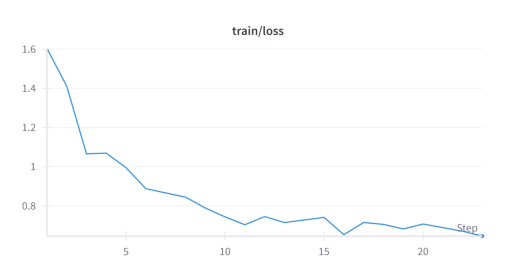

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/prealgebra_train_loss.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()

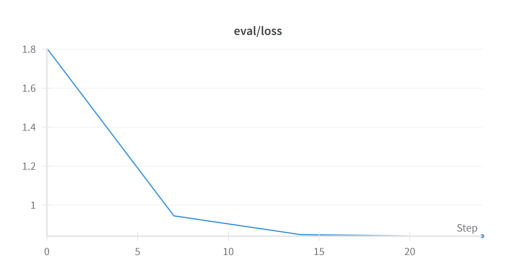

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/prealgebra_test_loss.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()

In [ ]:

# Попробуем обучить только на algebra


import wandb
wandb.init(project="math", name="algebra")


dataset=load_one_data(subset='MATH/train/algebra')
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_one_data(subset='MATH/test/algebra')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 5,
        warmup_steps = 5,
        max_steps = 600,
        num_train_epochs=5,
        learning_rate = 2e-5,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs_interm_algebra",
        evaluation_strategy="epoch",
    ),
)
trainer.evaluate()
trainer_stats = trainer.train()

# train/loss https://api.wandb.ai/links/izutkinaalexandra-bmstu/kxw3hq87
# eval/loss https://api.wandb.ai/links/izutkinaalexandra-bmstu/qpytklbs


wandb: Currently logged in as: izutkinaalexandra (izutkinaalexandra-bmstu). Use `wandb login --relogin` to force relogin


Map:   0%|          | 0/1744 [00:00<?, ? examples/s]

Map:   0%|          | 0/1187 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 1744
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/1744 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/1187 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.594700,0.726795,0.023100
2,0.646200,0.717322,0.023100
3,0.592300,0.720128,0.023100


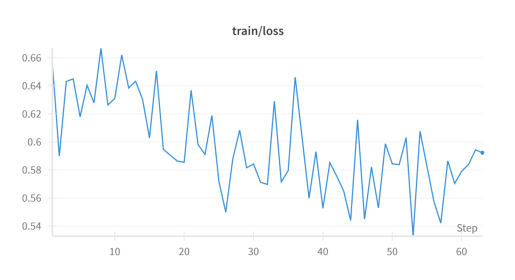

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/algebra_train_loss.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()

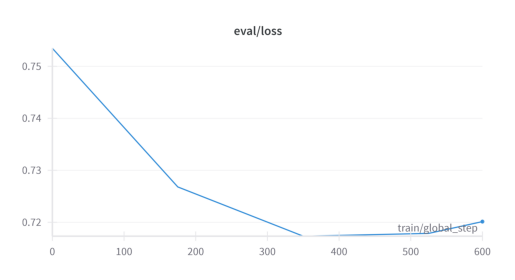

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/algebra_test_loss.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()

In [ ]:
#попробуем посмотреть пример

import numpy as np
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    {}

    ### Input:
    {}
    ### Response:
    {} """

inputs = dataset["input"][:2]
outputs = dataset["output"][:2]
instruction="Please reason step by step, and put your final answer within \\boxed{}"
texts = []

for input0, output0 in zip(inputs, outputs):
    text = alpaca_prompt.format(instruction,input0, output0) + EOS_TOKEN
    texts.append(text)

encoding=tokenizer(texts,return_tensors='pt', padding=True, truncation=True).to(device)
out=model(**encoding)
#decoded_output = tokenizer.decode(out.logits.argmax(dim=-1).cpu(), skip_special_tokens=True)
predicted_ids = out.logits.argmax(dim=-1)

# Decode each predicted ID tensor into text
decoded_outputs = [tokenizer.decode(ids, skip_special_tokens=True) for ids in predicted_ids]

# Print each decoded output
for output in decoded_outputs:
    print(output)
print("true solutions:")
print(outputs)

 is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    Please reason step by step, and put your final answer within \boxed{}

    ### Input:
    The have a following equation: a arithmetic sequence: $frac{1}{2}, \,1, 3x+ \ldots$. What for $x$.

    ### Response:
    The term consecutive terms of an arithmetic sequence are differ the difference difference. , thex-1) - \frac{1}{2} = 3x) - (x-1).

 which $x- \frac{3}{2} = 2x -1$. Solving for $x = \boxed{\\frac{5}{2}}$. Alternatively

ely利亚\



oningoning利亚
 is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    Please reason step by step, and put your final answer within \boxed{}

    ### Input:
    The that $a(x) = ^2$ where $k$ 0$, what is the range of $f(x)$ for the interval $[1, \infty)$?

  

In [ ]:

# Попробуем обучить только на geometry


import wandb
wandb.init(project="math", name="geometry")


dataset=load_one_data(subset='MATH/train/geometry')
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_one_data(subset='MATH/test/geometry')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 5,
        warmup_steps = 5,
        max_steps = 600,
        num_train_epochs=5,
        learning_rate = 2e-5,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs_interm_algebra",
        evaluation_strategy="epoch",
    ),
)
trainer.evaluate()
trainer_stats = trainer.train()

Map:   0%|          | 0/870 [00:00<?, ? examples/s]

Map:   0%|          | 0/479 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 870
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/870 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/479 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.774800,0.792978,0.018100
2,0.748600,0.778774,0.018100
3,0.736700,0.777999,0.018100
4,0.707000,0.774473,0.018100
5,0.732700,0.777288,0.018100
6,0.662300,0.778678,0.018100


In [ ]:

# Попробуем обучить на всех данных сразу



wandb.init(project="ALL", name="all")


dataset=load_data()
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_data(subset='MATH/test')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 5,
        warmup_steps = 5,
        max_steps = 2200,
        num_train_epochs=5,
        learning_rate = 1e-4,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 30,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "final",
        evaluation_strategy="epoch",
    ),
)
trainer.evaluate()


Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 7500
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/7500 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/5000 [00:00<?, ? examples/s]

{'eval_loss': 1.551395297050476,
 'eval_model_preparation_time': 0.0075,
 'eval_runtime': 221.8324,
 'eval_samples_per_second': 22.54,
 'eval_steps_per_second': 2.817}

In [ ]:
# до fine-tuning 'eval_loss': 1.551395297050476 !

In [ ]:
trainer_stats = trainer.train()

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.634500,0.714836,0.007500
2,0.552300,0.718101,0.007500


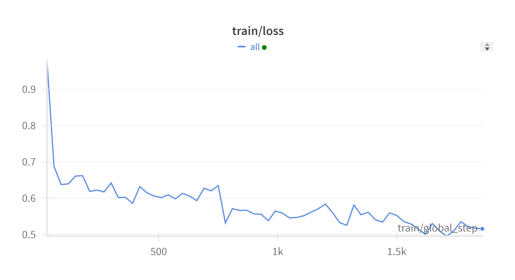

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/all_train.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()

#  https://wandb.ai/izutkinaalexandra-bmstu/ALL/reports/train-loss-24-12-25-06-47-55---VmlldzoxMDcxOTYyMA?accessToken=55blqewr1z2lwmg3f6rlvoum3dea5gx72ml3y2hv2aqt8drs0hcxxd1m6jczf8wc

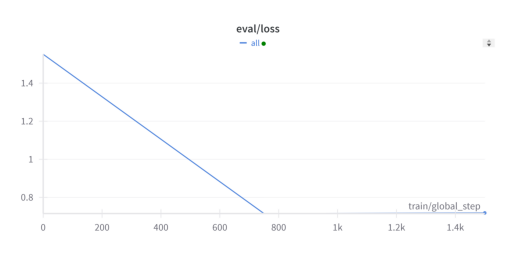

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
img = mpimg.imread('/content/all_eval.png')

# Отображение изображения
plt.imshow(img)
plt.axis('off')  # Отключить оси для лучшего вида
plt.show()


#  https://api.wandb.ai/links/izutkinaalexandra-bmstu/xk3s8imn

In [ ]:

# Попробуем изменить ранг LoRa с 8 на 16 --> быстрее начала переобучаться, лучше 8

import wandb
from trl import SFTTrainer
from transformers import TrainingArguments


wandb.init(project="ALL", name="all")


dataset=load_data()
dataset = Dataset.from_dict(dataset)
formatted_dataset = dataset.map(formatting_prompts_func, batched = True,)

test_dataset=load_data(subset='MATH/test')
test_dataset = Dataset.from_dict(test_dataset)
test_formatted_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

print(formatted_dataset)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_dataset,
    eval_dataset=test_formatted_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 5,
        warmup_steps = 5,
        max_steps = 2000,
        num_train_epochs=5,
        learning_rate = 1e-4,
        #remove_unused_columns=False,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 30,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "final",
        evaluation_strategy="epoch",
    ),
)
trainer.evaluate()


Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'output', 'text'],
    num_rows: 7500
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/7500 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/5000 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


{'eval_loss': 1.551395297050476,
 'eval_model_preparation_time': 0.0115,
 'eval_runtime': 260.0931,
 'eval_samples_per_second': 19.224,
 'eval_steps_per_second': 2.403}

In [ ]:
trainer_stats = trainer.train()

# https://wandb.ai/izutkinaalexandra-bmstu/ALL/runs/nyv74a4g?nw=nwuserizutkinaalexandra

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.632700,0.713725,0.011500
2,0.527900,0.733063,0.011500


In [ ]:
# Посмотрим примеры сгенерированных решений

def generate_answer(model,inputs,outputs):

    alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

        ### Instruction:
        {}

        ### Input:
        {}
        ### Response:
        {} """


    instruction="Please reason step by step, and put your final answer within \\boxed{}"
    texts = []

    for input0, output0 in zip(inputs, outputs):
        text = alpaca_prompt.format(instruction,input0, output0)# + EOS_TOKEN
        texts.append(text)

    encoding=tokenizer(texts,return_tensors='pt', padding=True, truncation=True).to(device)
    out=model(**encoding)

    predicted_ids = out.logits.argmax(dim=-1)

    decoded_outputs = [tokenizer.decode(ids, skip_special_tokens=True) for ids in predicted_ids]

    for output in decoded_outputs:
        print(output)
    print()
    print("true solutions:")
    print(outputs)

gc.collect()
#dataset=load_data()
inputs = dataset["input"][:2]
outputs = dataset["output"][:2]
model.eval()
gc.collect()

tokenizer=AutoTokenizer.from_pretrained(qwen_lm_qwen2_5_transformers_0_5b_instruct_1_path)
generate_answer(model,inputs,outputs)

 is an instruction that describes a task, paired with two input that provides further context. Write a response that appropriately completes the request.

Please ### Instruction:
        Please reason step by step, and put your final answer within \boxed{}

        ### Input:
        What $x(x) is a function such graph is $[-8,2)$$, and $g(x)=h\left(\frac x3\right)$, then what smallest of $g(x)$ is an interval of what length?

$\ ### Response:
        The $ have $g(x)= = h\left(\frac x}{2}\right)$, the possible number $x$ is in the domain of $g$ if and only if $\frac{x}{2}$ is in the domain of $h$. Since The, the domain of $g$ is of all numbersx$ such that $\-8\le \frac{x2 \le 8.$$ Multip interval to this inequality are $ by $-16\le x\le 16$, so the domain of $g$ is $ interval of length $\16 - (-16) = \boxed{32}$. (
 is an instruction that describes a task, paired with two input that provides further context. Write a response that appropriately completes the request.

Please ### Instru

In [ ]:
num_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Число обучаемых параметров:", num_parameters)

Число обучаемых параметров: 8798208


In [ ]:
# Попробуем посчитать другие метрики

from nltk.translate.bleu_score import sentence_bleu
import re
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
import gc
EOS_TOKEN = tokenizer.eos_token

def extract_answer(solution):
    pattern = r'\\boxed{([^}]*)}'
    match = re.search(pattern, solution)
    if match:
        return match.group(1)
    else:
        pattern = r'\boxed{([^}]*)}'
        match = re.search(pattern, solution)
        if match:
            return match.group(1)
        else:
            return 0



def calculate_metrics(model,dataset):
    torch.cuda.empty_cache()
    gc.collect()
    model.eval()
    all_loss = 0
    all_bleu=0
    all_acc=0
    total_correct = 0
    total_tokens = 0
    example=1
    correct_answer=0
    alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

        ### Instruction:
        {}

        ### Input:
        {}
        ### Response:
        {} """

    inputs = dataset["input"][:20]
    outputs = dataset["output"][:20]
    instruction="Please reason step by step, and put your final answer within \\boxed{}"
    texts = []

    for input0, output0 in zip(inputs, outputs):
        text = alpaca_prompt.format(instruction,input0, output0) + EOS_TOKEN
        texts.append(text)

    encoding=tokenizer(texts,return_tensors='pt', padding=True, truncation=True).to(device)
    out=model(**encoding)

    predicted_ids = out.logits.argmax(dim=-1)
    decoded_outputs = [tokenizer.decode(ids, skip_special_tokens=True) for ids in predicted_ids]

    n=len(decoded_outputs)

    for i in range(len(decoded_outputs)):

        bleu_score = sentence_bleu([outputs[i]], decoded_outputs[i])
        all_bleu+=bleu_score

        correct = sum(1 for pred, label in zip(decoded_outputs[i], outputs[i]) if pred == label)
        total_correct += correct
        total_tokens += len(outputs[i])
        accuracy = total_correct / total_tokens
        all_acc+=accuracy

        if extract_answer(decoded_outputs[i])== extract_answer(outputs[i]):
                correct_answer+=1


    avg_bleu=all_bleu / n
    avg_acc=all_acc / n
    part_correct=correct_answer/n

    print(f"average bleu: {avg_bleu:.4f}")
    print(f"average accuracy: {avg_acc:.4f}")
    print(f"part of correct answers: {part_correct:.4f}")

calculate_metrics(model, dataset)

average bleu: 0.2108
average accuracy: 0.0533
part of correct answers: 0.2200


In [ ]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2ForCausalLM(
      (model): Qwen2Model(
        (embed_tokens): Embedding(151936, 896, padding_idx=151643)
        (layers): ModuleList(
          (0-23): 24 x Qwen2DecoderLayer(
            (self_attn): Qwen2Attention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=896, out_features=896, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=896, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=896, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Line

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer

trainer.model.save_pretrained("checkpoint-final")

model = AutoModelForCausalLM.from_pretrained(
    "sample_data/checkpoint-final",

    low_cpu_mem_usage=True
)